# Basis functions and scikit-learn

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## Load data

In [5]:
dat = pd.read_csv("./rbfs/phi_short_reduce.csv")
dat.head()

/var/folders/ws/m03sh3xd4ns621mckfrht3r0000_08/T/ipykernel_3531/2538642985.py:1: DtypeWarning: Columns (204) have mixed types. Specify dtype option on import or set low_memory=False.
  dat = pd.read_csv("./rbfs/phi_short_reduce.csv")


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,194,195,196,197,198,199,200,y,site,date
0,0,1.000000,0.962154,0.856997,0.706648,0.539408,0.381171,0.249352,0.151007,0.084658,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014,2005.0,2023-01-01
1,1,0.999994,0.963078,0.858649,0.708695,0.541492,0.383014,0.250800,0.152030,0.085314,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007,2005.0,2023-01-01
2,2,0.999976,0.963992,0.860293,0.710738,0.543578,0.384861,0.252253,0.153059,0.085974,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002,2005.0,2023-01-01
3,3,0.999946,0.964894,0.861931,0.712779,0.545666,0.386713,0.253711,0.154092,0.086639,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009,2005.0,2023-01-01
4,4,0.999903,0.965785,0.863561,0.714817,0.547755,0.388568,0.255175,0.155131,0.087307,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011,2005.0,2023-01-01


In [6]:
X = dat.iloc[:, 1:202].to_numpy()
y = dat['y'].to_numpy()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.8, random_state=42)

In [8]:
aq_rf = ensemble.RandomForestRegressor()

In [9]:
aq_rf.fit(X_train, y_train)

RandomForestRegressor()

In [10]:
y_test2 = y_test.reshape(1, -1)

In [11]:
y_test_pred = aq_rf.predict(X_test)

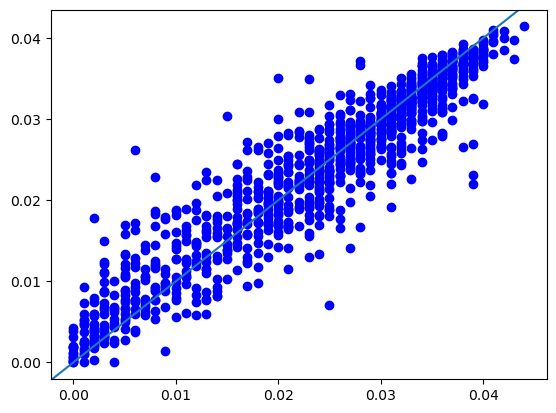

In [12]:
plt.plot(y_test, y_test_pred, 'bo')
plt.axline((0,0), slope=1)
plt.show()

In [13]:
print(f"MAE: {mean_absolute_error(y_test, y_test_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_test_pred):.4f}")

MAE: 0.0026
MSE: 0.0000


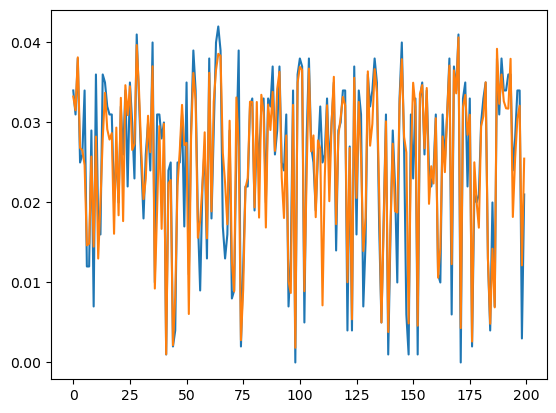

In [14]:
plt.plot(y_test[0:200])
plt.plot(y_test_pred[0:200])
plt.show()

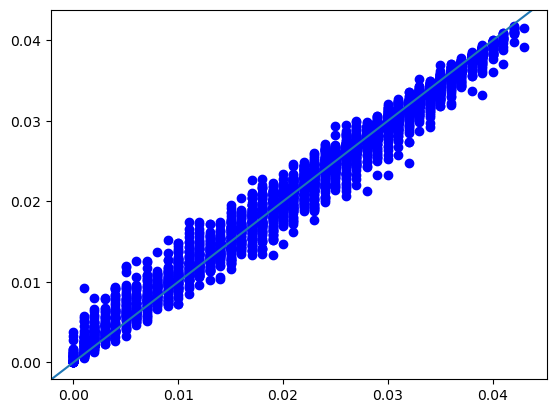

In [15]:
y_train_pred = aq_rf.predict(X_train)
plt.plot(y_train, y_train_pred, 'bo')
plt.axline((0,0), slope=1)
plt.show()